In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Load the dataset into python environment

In [2]:
data = pd.read_csv(r"F:\DSA\titanic_dataset.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 2. Make ‘PassengerId’ as the index column

In [4]:
data.set_index('PassengerId', inplace=True)

In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 3. Check the basic details of the dataset

In [6]:
data1 = pd.read_csv(r"F:\DSA\titanic_dataset.csv")

In [7]:
data1.set_index('PassengerId', inplace=True)

In [8]:
data1.shape

(891, 11)

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [10]:
data1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
type(data1)

pandas.core.frame.DataFrame

In [12]:
data1.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [13]:
data1.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## 4. Fill in all the missing values present in all the columns in the dataset

In [14]:
num_cols = data1[['Age','Cabin', 'Embarked']]

In [15]:
num_cols.isna().sum()

Age         177
Cabin       687
Embarked      2
dtype: int64

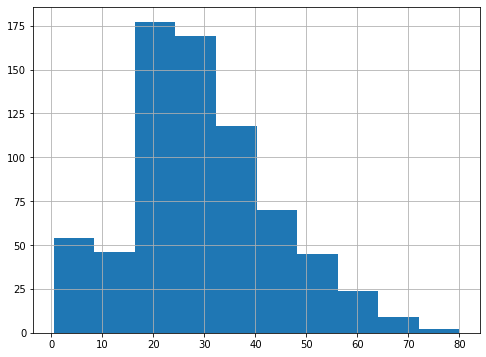

In [16]:
data1['Age'].hist(figsize=[8,6])
plt.show()

In [17]:
## As the graph is skewed median is used to fill missing values
data1['Age'].median()

28.0

In [18]:
data1['Age'] = data1['Age'].fillna(data1['Age'].median())

In [19]:
data1['Age'].isna().sum()

0

In [20]:
data1['Cabin']

PassengerId
1       NaN
2       C85
3       NaN
4      C123
5       NaN
       ... 
887     NaN
888     B42
889     NaN
890    C148
891     NaN
Name: Cabin, Length: 891, dtype: object

In [21]:
data1['Cabin'] = data1['Cabin'].fillna('Value is missing')

In [22]:
data1['Cabin'].isna().sum()

0

In [23]:
data1['Cabin']

PassengerId
1      Value is missing
2                   C85
3      Value is missing
4                  C123
5      Value is missing
             ...       
887    Value is missing
888                 B42
889    Value is missing
890                C148
891    Value is missing
Name: Cabin, Length: 891, dtype: object

In [24]:
data1['Embarked'] = data1['Embarked'].fillna(data1['Embarked'].mode().iloc[0])

In [25]:
data1['Embarked'].isna().sum()

0

In [26]:
data1.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [27]:
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Value is missing,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Value is missing,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Value is missing,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Value is missing,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Value is missing,S


## 5. Check and handle outliers in at least 3 columns in the dataset

In [47]:
## Handling the outliers in the column 'Fare'

Text(0.5, 1.0, 'Boxplot for Fare')

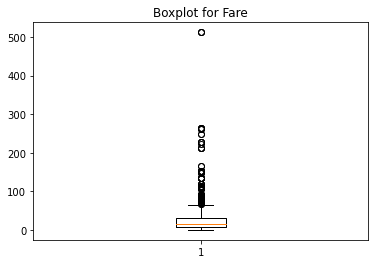

In [28]:
plt.boxplot(data1['Fare'])
plt.title('Boxplot for Fare')

In [29]:
Q1 = np.percentile(data1['Fare'],25)

In [30]:
Q1

7.9104

In [31]:
Q2 = np.percentile(data1['Fare'],50)

In [32]:
Q2

14.4542

In [33]:
Q3= np.percentile(data1['Fare'],75)

In [34]:
Q3

31.0

In [35]:
IQR=Q3-Q1

In [36]:
IQR

23.0896

In [37]:
low_limit = Q1 - 1.5*IQR
upr_limit = Q3 + 1.5*IQR

In [38]:
low_limit

-26.724

In [39]:
upr_limit

65.6344

In [41]:
outlier_for_fare=[]
for x in data1['Fare']:
    if x>upr_limit or x<low_limit:
        outlier_for_fare.append(x)

In [42]:
outlier_for_fare

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [43]:
ind = data1['Fare']>upr_limit
ind1=data1.loc[ind].index

In [44]:
ind1

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', name='PassengerId', length=116)

In [45]:
data1.drop(ind1, inplace = True)

In [46]:
data1.shape

(775, 11)

In [48]:
## Handling outliers in column 'SibSp'

Text(0.5, 1.0, 'Boxplot for SibSp')

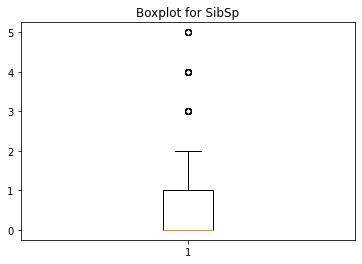

In [49]:
plt.boxplot(data1['SibSp'])
plt.title('Boxplot for SibSp')

In [50]:
Q1= np.percentile(data1['SibSp'],25)

In [51]:
Q1

0.0

In [52]:
Q2= np.percentile(data1['SibSp'],50)

In [53]:
Q2

0.0

In [54]:
Q3= np.percentile(data1['SibSp'],75)

In [55]:
Q3

1.0

In [56]:
IQR = Q3-Q1

In [57]:
IQR

1.0

In [58]:
low_limit = Q1 - 1.5*IQR
upr_limit = Q3 + 1.5*IQR

In [59]:
low_limit

-1.5

In [60]:
upr_limit

2.5

In [61]:
outlier_for_SibSp=[]
for x in data1['SibSp']:
    if x>upr_limit or x<low_limit:
        outlier_for_SibSp.append(x)

In [62]:
outlier_for_SibSp

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [63]:
ind = data1['SibSp']>upr_limit
data1.loc[ind].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],
           dtype='int64', name='PassengerId')

In [64]:
data1.drop([8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 165, 172, 177,
            183, 230, 234, 262, 267, 279, 375, 387, 410, 481, 486, 542, 543,
            635, 643, 684, 687, 727, 788, 814, 820, 825, 851],inplace= True)

In [65]:
data1.shape

(739, 11)

In [66]:
## Handling the outlier in column age

Text(0.5, 1.0, 'Boxplot for Age')

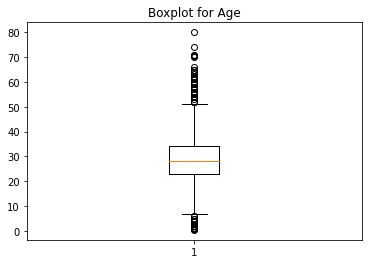

In [67]:
plt.boxplot(data1['Age'])
plt.title('Boxplot for Age')

In [68]:
Q1= np.percentile(data1['Age'],25)

In [69]:
Q1

23.0

In [70]:
Q2= np.percentile(data1['Age'],50)

In [71]:
Q2

28.0

In [72]:
Q3= np.percentile(data1['Age'],75)

In [73]:
Q3

34.25

In [74]:
IQR=Q3-Q1

In [75]:
IQR

11.25

In [76]:
low_limit = Q1 - 1.5*IQR
upr_limit = Q3 + 1.5*IQR

In [77]:
low_limit

6.125

In [78]:
upr_limit

51.125

In [79]:
outlier_for_age=[]
for x in data1['Age']:
    if x>upr_limit or x<low_limit:
        outlier_for_age.append(x)

In [80]:
outlier_for_age

[54.0,
 4.0,
 58.0,
 55.0,
 66.0,
 3.0,
 65.0,
 5.0,
 0.83,
 59.0,
 71.0,
 70.5,
 55.5,
 61.0,
 1.0,
 56.0,
 1.0,
 4.0,
 3.0,
 2.0,
 59.0,
 54.0,
 62.0,
 65.0,
 54.0,
 61.0,
 2.0,
 3.0,
 1.0,
 3.0,
 5.0,
 52.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 54.0,
 2.0,
 64.0,
 62.0,
 62.0,
 53.0,
 54.0,
 4.0,
 61.0,
 57.0,
 80.0,
 0.75,
 56.0,
 70.0,
 60.0,
 4.0,
 60.0,
 52.0,
 52.0,
 6.0,
 4.0,
 6.0,
 0.67,
 57.0,
 54.0,
 5.0,
 1.0,
 0.42,
 1.0,
 0.83,
 74.0,
 4.0]

In [81]:
ind = data1['Age']>upr_limit
ind2= data1['Age']<low_limit
data1.loc[ind].index

Int64Index([  7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 233, 250,
            253, 281, 318, 327, 450, 457, 468, 484, 488, 493, 494, 514, 546,
            556, 571, 572, 583, 626, 627, 631, 648, 673, 685, 695, 696, 715,
            773, 775, 852],
           dtype='int64', name='PassengerId')

In [82]:
data1.loc[ind2].index

Int64Index([ 11,  44,  59,  79, 173, 184, 185, 194, 206, 341, 349, 382, 408,
            449, 470, 480, 531, 619, 645, 692, 721, 751, 752, 756, 778, 789,
            804, 828, 832, 870],
           dtype='int64', name='PassengerId')

In [83]:
data1.drop([7,  12,  16,  34,  55,  95,  97, 117, 153, 171, 175, 233, 250,
            253, 281, 318, 327, 450, 457, 468, 484, 488, 493, 494, 514, 546,
            556, 571, 572, 583, 626, 627, 631, 648, 673, 685, 695, 696, 715,
            773, 775, 852], inplace = True)

In [84]:
data1.drop([11,  44,  59,  79, 173, 184, 185, 194, 206, 341, 349, 382, 408,
            449, 470, 480, 531, 619, 645, 692, 721, 751, 752, 756, 778, 789,
            804, 828, 832, 870], inplace = True)

In [85]:
data1.shape

(667, 11)

## 6. Do min max scaling on the feature set (Take ‘Survived’ as target)

In [86]:
data2=pd.read_csv(r"F:\DSA\titanic_dataset.csv")

In [87]:
data2['Age'] = data2['Age'].fillna(data2['Age'].median())

In [88]:
data2['Cabin'] = data2['Cabin'].fillna('Value is missing')

In [89]:
data2['Embarked'] = data2['Embarked'].fillna(data2['Embarked'].mode().iloc[0])

In [90]:
data2.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [91]:
x = data2.drop('Survived',axis=1)

In [92]:
y = data2['Survived']

In [93]:
x

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Value is missing,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Value is missing,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Value is missing,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Value is missing,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,Value is missing,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [94]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [95]:
x.Name.nunique()

891

In [96]:
x.PassengerId.nunique()

891

In [97]:
x.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [98]:
x = x.drop(['Name','Cabin','PassengerId'],axis=1)

In [100]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Ticket'] = le.fit_transform(x['Ticket'])

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Embarked'] = le.fit_transform(x['Embarked'])

In [103]:
x

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,22.0,1,0,523,7.2500,2
1,1,0,38.0,1,0,596,71.2833,0
2,3,0,26.0,0,0,669,7.9250,2
3,1,0,35.0,1,0,49,53.1000,2
4,3,1,35.0,0,0,472,8.0500,2
...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,101,13.0000,2
887,1,0,19.0,0,0,14,30.0000,2
888,3,0,28.0,1,2,675,23.4500,2
889,1,1,26.0,0,0,8,30.0000,0


In [104]:
x1 = x.drop(['Sex','Embarked'],axis=1)

In [105]:
x1

,Pclass,Age,SibSp,Parch,Ticket,Fare
0,3,22.0,1,0,523,7.2500
1,1,38.0,1,0,596,71.2833
2,3,26.0,0,0,669,7.9250
3,1,35.0,1,0,49,53.1000
4,3,35.0,0,0,472,8.0500
...,...,...,...,...,...,...
886,2,27.0,0,0,101,13.0000
887,1,19.0,0,0,14,30.0000
888,3,28.0,1,2,675,23.4500
889,1,26.0,0,0,8,30.0000


In [106]:
from sklearn.preprocessing import MinMaxScaler
min_max =  MinMaxScaler(feature_range=(0,1))
x1 = min_max.fit_transform(x1)

In [107]:
type(x1)

numpy.ndarray

In [108]:
x1= pd.DataFrame(x1)

In [109]:
type(x1)

pandas.core.frame.DataFrame

In [110]:
x1.describe()

,0,1,2,3,4,5
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.654321,0.363679,0.065376,0.063599,0.497836,0.062858
std,0.418036,0.163605,0.137843,0.134343,0.295369,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.271174,0.000000,0.000000,0.233088,0.015440
50%,1.000000,0.346569,0.000000,0.000000,0.495588,0.028213
75%,1.000000,0.434531,0.125000,0.000000,0.763971,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [111]:
x1

,0,1,2,3,4,5
0,1.0,0.271174,0.125,0.000000,0.769118,0.014151
1,0.0,0.472229,0.125,0.000000,0.876471,0.139136
2,1.0,0.321438,0.000,0.000000,0.983824,0.015469
3,0.0,0.434531,0.125,0.000000,0.072059,0.103644
4,1.0,0.434531,0.000,0.000000,0.694118,0.015713
...,...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.148529,0.025374
887,0.0,0.233476,0.000,0.000000,0.020588,0.058556
888,1.0,0.346569,0.125,0.333333,0.992647,0.045771
889,0.0,0.321438,0.000,0.000000,0.011765,0.058556


In [112]:
x= x.drop(['Pclass','Age','SibSp','Parch','Ticket','Fare'],axis=1)

In [113]:
x

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2
...,...,...
886,1,2
887,0,2
888,0,2
889,1,0


In [114]:
x= pd.concat([x,x1],axis=1)

In [115]:
x.columns=['Sex','Embarked','Pclass','Age','SibSp','Parch','Ticket','Fare']

In [116]:
x

,Sex,Embarked,Pclass,Age,SibSp,Parch,Ticket,Fare
0,1,2,1.0,0.271174,0.125,0.000000,0.769118,0.014151
1,0,0,0.0,0.472229,0.125,0.000000,0.876471,0.139136
2,0,2,1.0,0.321438,0.000,0.000000,0.983824,0.015469
3,0,2,0.0,0.434531,0.125,0.000000,0.072059,0.103644
4,1,2,1.0,0.434531,0.000,0.000000,0.694118,0.015713
...,...,...,...,...,...,...,...,...
886,1,2,0.5,0.334004,0.000,0.000000,0.148529,0.025374
887,0,2,0.0,0.233476,0.000,0.000000,0.020588,0.058556
888,0,2,1.0,0.346569,0.125,0.333333,0.992647,0.045771
889,1,0,0.0,0.321438,0.000,0.000000,0.011765,0.058556
